In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

In [14]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [16]:
data = data.dropna()

<Axes: xlabel='Class', ylabel='count'>

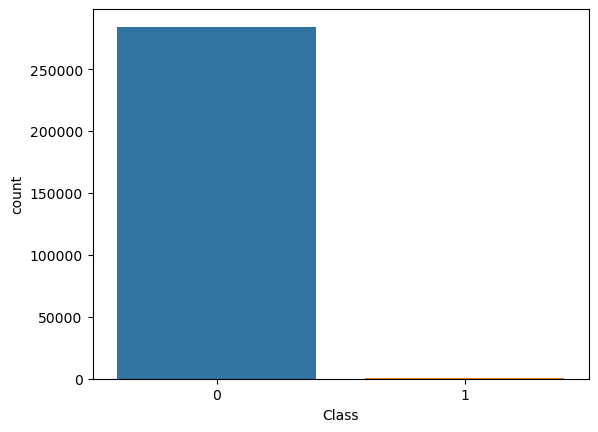

In [17]:
sns.countplot(x=data['Class'])

In [18]:
X = data.drop('Class', axis=1)
y = data['Class']

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.metrics import geometric_mean_score
from sklearn import metrics

In [20]:
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []
gmean = []
auc = []

#function to call for storing the results
def storeResults(model, a,b,c,d,e,f):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))
    gmean.append(round(e, 3))
    auc.append(round(f, 3))

In [21]:
def importance_getter(estimator):
    from sklearn.inspection import permutation_importance
    results = permutation_importance(estimator, X, y)
    return results.importances_mean

In [22]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

In [23]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier

clf1 = LGBMClassifier()
clf2 = DecisionTreeClassifier()

In [24]:
selector = SelectFromModel(
    estimator= VotingClassifier(estimators=[('lgbm', clf1), ('dt', clf2), ], voting='soft'),
    importance_getter=importance_getter,
)

In [25]:
selector.fit(X, y)

[LightGBM] [Info] Number of positive: 492, number of negative: 284315
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030150 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 284807, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001727 -> initscore=-6.359359
[LightGBM] [Info] Start training from score -6.359359


SelectFromModel(estimator=VotingClassifier(estimators=[('lgbm',
                                                        LGBMClassifier()),
                                                       ('dt',
                                                        DecisionTreeClassifier())],
                                           voting='soft'),
                importance_getter=<function importance_getter at 0x000001CB76914A40>)

In [26]:
feature_idx = selector.get_support()

In [27]:
feature_name = X.columns[feature_idx]

In [28]:
feature_name

Index(['V3', 'V4', 'V5', 'V7', 'V8', 'V10', 'V12', 'V14', 'V17', 'V26'], dtype='object')

In [29]:
X_2 = data[['V3', 'V4', 'V5', 'V7', 'V10', 'V11', 'V12', 'V14', 'V17', 'V26']]

# SOBT

In [30]:
from imblearn.over_sampling import RandomOverSampler
sbot = RandomOverSampler(random_state=42)

In [31]:
X_res, y_res = sbot.fit_resample(X_2, y)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.20, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((454904, 10), (454904,), (113726, 10), (113726,))

# LightGBM

In [33]:
clf = LGBMClassifier()
clf.fit(X_train, y_train) # Train

y_pred = clf.predict(X_test) # Test predictions

lgbma_acc = accuracy_score(y_pred, y_test)
lgbma_prec = precision_score(y_pred, y_test)
lgbma_rec = recall_score(y_pred, y_test)
lgbma_f1 = f1_score(y_pred, y_test)
lgbma_gm = geometric_mean_score(y_pred, y_test)
lgbma_auc = roc_auc_score(y, clf.predict_proba(X_2)[:, 1])

[LightGBM] [Info] Number of positive: 227339, number of negative: 227565
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014617 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 454904, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499752 -> initscore=-0.000994
[LightGBM] [Info] Start training from score -0.000994


In [34]:
storeResults('SOBT-LightGBM',lgbma_acc,lgbma_prec,lgbma_rec,lgbma_f1,lgbma_gm,lgbma_auc)

# XGBoost

In [35]:
from xgboost import XGBClassifier

clf = XGBClassifier()
clf.fit(X_train, y_train) # Train

y_pred = clf.predict(X_test) # Test predictions

xgba_acc = accuracy_score(y_pred, y_test)
xgba_prec = precision_score(y_pred, y_test)
xgba_rec = recall_score(y_pred, y_test)
xgba_f1 = f1_score(y_pred, y_test)
xgba_gm = geometric_mean_score(y_pred, y_test)
xgba_auc = roc_auc_score(y, clf.predict_proba(X_2)[:, 1])

In [36]:
storeResults('SOBT-XGBoost',xgba_acc,xgba_prec,xgba_rec,xgba_f1,xgba_gm,xgba_auc)

# Voting Classifier

In [37]:
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier, RandomForestClassifier
clf1 = AdaBoostClassifier()
clf2 = RandomForestClassifier()

eclf1 = VotingClassifier(estimators=[('ab', clf1), ('rf', clf2), ], voting='soft')
eclf1.fit(X_train, y_train)
y_pred = eclf1.predict(X_test)

vota_acc = accuracy_score(y_pred, y_test)
vota_prec = precision_score(y_pred, y_test)
vota_rec = recall_score(y_pred, y_test)
vota_f1 = f1_score(y_pred, y_test)
vota_gm = geometric_mean_score(y_pred, y_test)
vota_auc = roc_auc_score(y, eclf1.predict_proba(X_2)[:, 1])

In [38]:
storeResults('SOBT-VotingClassifier',vota_acc,vota_prec,vota_rec,vota_f1,vota_gm,vota_auc)

# SMOTE

In [39]:
from imblearn.over_sampling import SMOTE

In [40]:
sm = SMOTE(random_state=42)

In [41]:
X_res, y_res = sm.fit_resample(X_2, y)

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.20, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((454904, 10), (454904,), (113726, 10), (113726,))

# LightGBM

In [43]:
clf = LGBMClassifier()
clf.fit(X_train, y_train) # Train

y_pred = clf.predict(X_test) # Test predictions

lgbmb_acc = accuracy_score(y_pred, y_test)
lgbmb_prec = precision_score(y_pred, y_test)
lgbmb_rec = recall_score(y_pred, y_test)
lgbmb_f1 = f1_score(y_pred, y_test)
lgbmb_gm = geometric_mean_score(y_pred, y_test)
lgbmb_auc = roc_auc_score(y, clf.predict_proba(X_2)[:, 1])

[LightGBM] [Info] Number of positive: 227339, number of negative: 227565
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014266 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 454904, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499752 -> initscore=-0.000994
[LightGBM] [Info] Start training from score -0.000994


In [44]:
storeResults('SMOTE-LightGBM',lgbmb_acc,lgbmb_prec,lgbmb_rec,lgbmb_f1,lgbmb_gm,lgbmb_auc)

# XGBoost

In [45]:
clf = XGBClassifier()
clf.fit(X_train, y_train) # Train

y_pred = clf.predict(X_test) # Test predictions

xgbb_acc = accuracy_score(y_pred, y_test)
xgbb_prec = precision_score(y_pred, y_test)
xgbb_rec = recall_score(y_pred, y_test)
xgbb_f1 = f1_score(y_pred, y_test)
xgbb_gm = geometric_mean_score(y_pred, y_test)
xgbb_auc = roc_auc_score(y, clf.predict_proba(X_2)[:, 1])

In [46]:
storeResults('SMOTE-XGBoost',xgbb_acc,xgbb_prec,xgbb_rec,xgbb_f1,xgbb_gm,xgbb_auc)

# Voting Classifier

In [47]:
eclf2 = VotingClassifier(estimators=[('ab', clf1), ('rf', clf2), ], voting='soft')
eclf2.fit(X_train, y_train)
y_pred = eclf2.predict(X_test)

votb_acc = accuracy_score(y_pred, y_test)
votb_prec = precision_score(y_pred, y_test)
votb_rec = recall_score(y_pred, y_test)
votb_f1 = f1_score(y_pred, y_test)
votb_gm = geometric_mean_score(y_pred, y_test)
votb_auc = roc_auc_score(y, eclf2.predict_proba(X_2)[:, 1])

In [48]:
storeResults('SMOTE-VotingClassifier',votb_acc,votb_prec,votb_rec,votb_f1,votb_gm,votb_auc)

# ADASYN

In [49]:
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=42)

In [50]:
X_res, y_res = ada.fit_resample(X_2, y)

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.20, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((454884, 10), (454884,), (113721, 10), (113721,))

# LightGBM

In [52]:
clf = LGBMClassifier()
clf.fit(X_train, y_train) # Train

y_pred = clf.predict(X_test) # Test predictions

lgbmc_acc = accuracy_score(y_pred, y_test)
lgbmc_prec = precision_score(y_pred, y_test)
lgbmc_rec = recall_score(y_pred, y_test)
lgbmc_f1 = f1_score(y_pred, y_test)
lgbmc_gm = geometric_mean_score(y_pred, y_test)
lgbmc_auc = roc_auc_score(y, clf.predict_proba(X_2)[:, 1])

[LightGBM] [Info] Number of positive: 227383, number of negative: 227501
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021797 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 454884, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499870 -> initscore=-0.000519
[LightGBM] [Info] Start training from score -0.000519


In [53]:
storeResults('ADASYN-LightGBM',lgbmc_acc,lgbmc_prec,lgbmc_rec,lgbmc_f1,lgbmc_gm,lgbmc_auc)

# XGBoost

In [54]:
clf = XGBClassifier()
clf.fit(X_train, y_train) # Train

y_pred = clf.predict(X_test) # Test predictions

xgbc_acc = accuracy_score(y_pred, y_test)
xgbc_prec = precision_score(y_pred, y_test)
xgbc_rec = recall_score(y_pred, y_test)
xgbc_f1 = f1_score(y_pred, y_test)
xgbc_gm = geometric_mean_score(y_pred, y_test)
xgbc_auc = roc_auc_score(y, clf.predict_proba(X_2)[:, 1])

In [55]:
storeResults('ADASYN-XGBoost',xgbc_acc,xgbc_prec,xgbc_rec,xgbc_f1,xgbc_gm,xgbc_auc)

# Voting Classifier

In [56]:
eclf3 = VotingClassifier(estimators=[('ab', clf1), ('rf', clf2), ], voting='soft')
eclf3.fit(X_train, y_train)
y_pred = eclf3.predict(X_test)

votc_acc = accuracy_score(y_pred, y_test)
votc_prec = precision_score(y_pred, y_test)
votc_rec = recall_score(y_pred, y_test)
votc_f1 = f1_score(y_pred, y_test)
votc_gm = geometric_mean_score(y_pred, y_test)
votc_auc = roc_auc_score(y, eclf3.predict_proba(X_2)[:, 1])

In [57]:
storeResults('ADASYN-VotingClassifier',votc_acc,votc_prec,votc_rec,votc_f1,votc_gm,votc_auc)

# BorderlineSMOTE

In [58]:
from imblearn.over_sampling import BorderlineSMOTE
sm = BorderlineSMOTE(random_state=42)

In [59]:
X_res, y_res = sm.fit_resample(X_2, y)

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.20, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((454904, 10), (454904,), (113726, 10), (113726,))

# LightGBM

In [61]:
clf = LGBMClassifier()
clf.fit(X_train, y_train) # Train

y_pred = clf.predict(X_test) # Test predictions

lgbmd_acc = accuracy_score(y_pred, y_test)
lgbmd_prec = precision_score(y_pred, y_test)
lgbmd_rec = recall_score(y_pred, y_test)
lgbmd_f1 = f1_score(y_pred, y_test)
lgbmd_gm = geometric_mean_score(y_pred, y_test)
lgbmd_auc = roc_auc_score(y, clf.predict_proba(X_2)[:, 1])

[LightGBM] [Info] Number of positive: 227339, number of negative: 227565
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015897 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 454904, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499752 -> initscore=-0.000994
[LightGBM] [Info] Start training from score -0.000994


In [62]:
storeResults('BorderlineSMOTE-LightGBM',lgbmd_acc,lgbmd_prec,lgbmd_rec,lgbmd_f1,lgbmd_gm,lgbmd_auc)

# XGBoost

In [63]:
clf = XGBClassifier()
clf.fit(X_train, y_train) # Train

y_pred = clf.predict(X_test) # Test predictions

xgbd_acc = accuracy_score(y_pred, y_test)
xgbd_prec = precision_score(y_pred, y_test)
xgbd_rec = recall_score(y_pred, y_test)
xgbd_f1 = f1_score(y_pred, y_test)
xgbd_gm = geometric_mean_score(y_pred, y_test)
xgbd_auc = roc_auc_score(y, clf.predict_proba(X_2)[:, 1])

In [64]:
storeResults('BorderlineSMOTE-XGBoost',xgbd_acc,xgbd_prec,xgbd_rec,xgbd_f1,xgbd_gm,xgbd_auc)

# Voting Classifier

In [65]:
eclf4 = VotingClassifier(estimators=[('ab', clf1), ('rf', clf2), ], voting='soft')
eclf4.fit(X_train, y_train)
y_pred = eclf4.predict(X_test)

votd_acc = accuracy_score(y_pred, y_test)
votd_prec = precision_score(y_pred, y_test)
votd_rec = recall_score(y_pred, y_test)
votd_f1 = f1_score(y_pred, y_test)
votd_gm = geometric_mean_score(y_pred, y_test)
votd_auc = roc_auc_score(y, eclf4.predict_proba(X_2)[:, 1])

In [66]:
storeResults('BorderlineSMOTE-VotingClassifier',votd_acc,votd_prec,votd_rec,votd_f1,votd_gm,votd_auc)

# Comparison

In [67]:
#creating dataframe
import pandas as pd
import numpy as np
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1score,
                        'Recall'   : recall,
                        'Precision': precision,
                        'G-Mean' : gmean,
                        'AUC' : auc
                      })

In [68]:
result

,ML Model,Accuracy,f1_score,Recall,Precision,G-Mean,AUC
0,SOBT-LightGBM,1.00,1.00,1.00,1.00,1.00,1.00
1,SOBT-XGBoost,1.00,1.00,1.00,1.00,1.00,1.00
2,SOBT-VotingClassifier,1.00,1.00,1.00,1.00,1.00,1.00
3,SMOTE-LightGBM,0.99,0.99,0.99,1.00,0.99,1.00
4,SMOTE-XGBoost,1.00,1.00,1.00,1.00,1.00,1.00
5,SMOTE-VotingClassifier,1.00,1.00,1.00,1.00,1.00,1.00
6,ADASYN-LightGBM,0.99,0.99,0.99,1.00,0.99,1.00
7,ADASYN-XGBoost,1.00,1.00,1.00,1.00,1.00,1.00
8,ADASYN-VotingClassifier,1.00,1.00,1.00,1.00,1.00,1.00
9,BorderlineSMOTE-LightGBM,1.00,1.00,1.00,1.00,1.00,0.99


# Modelling

In [69]:
import joblib
filename = 'model.sav'
joblib.dump(eclf4, filename)

['model.sav']

# Graph

In [70]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

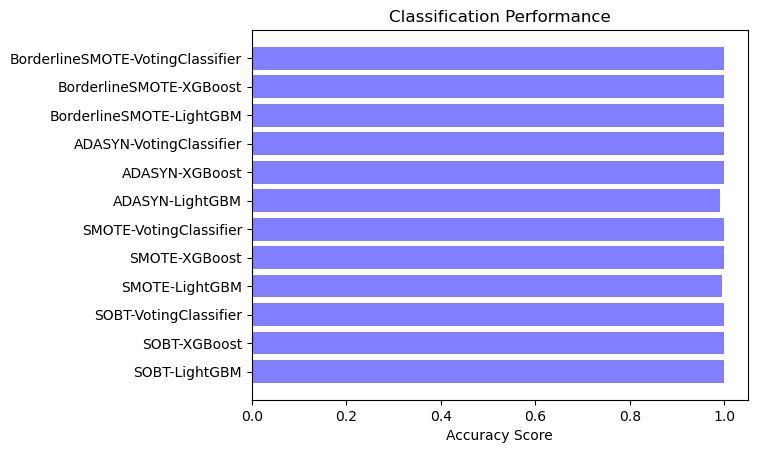

In [71]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

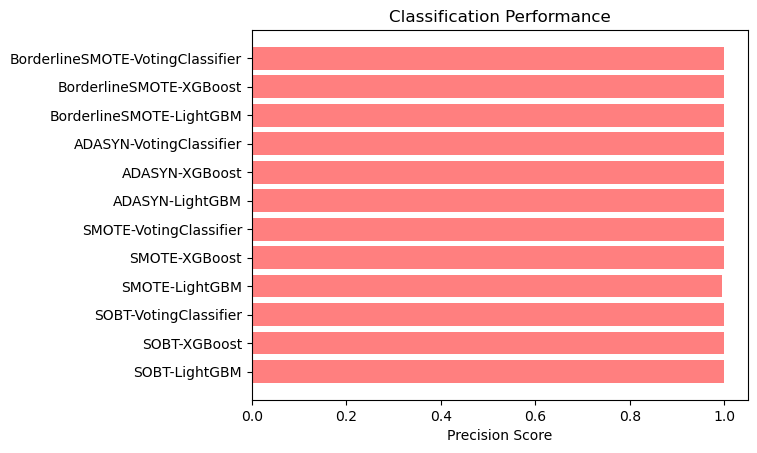

In [72]:
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

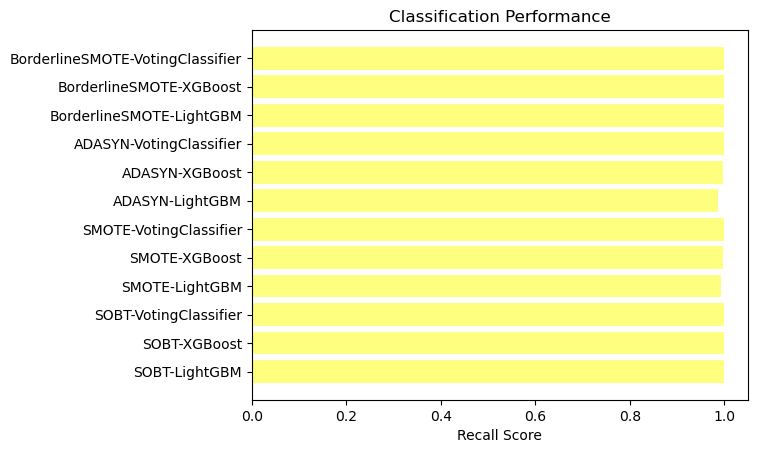

In [73]:
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 Score

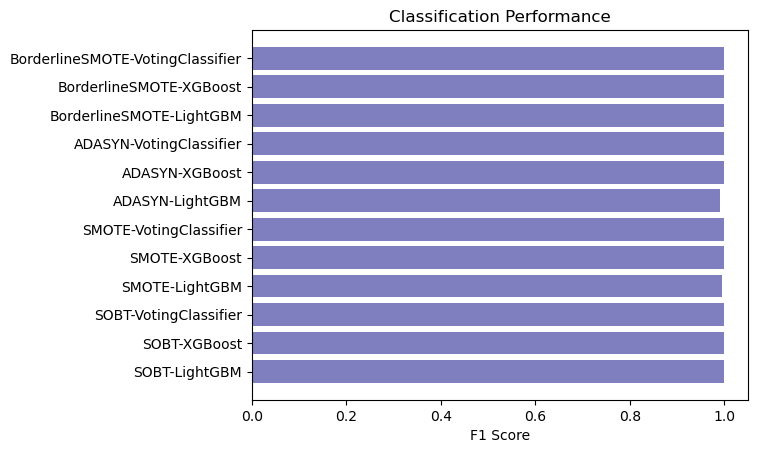

In [74]:
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='navy')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()

# G-Mean

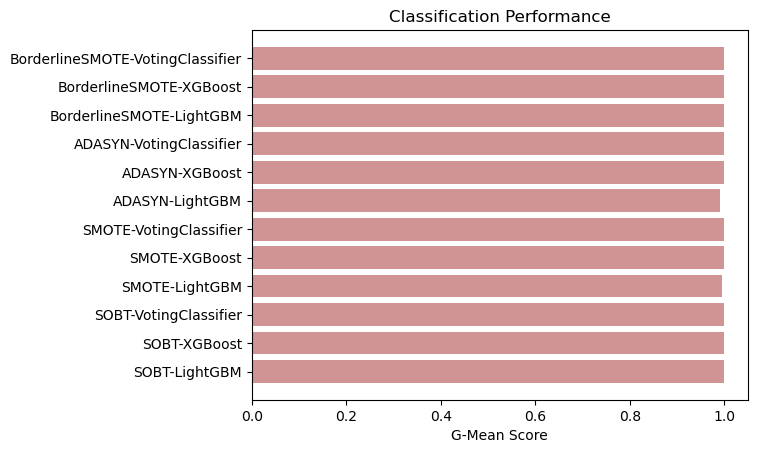

In [75]:
plt2.barh(y_pos, gmean, align='center', alpha=0.5,color='brown')
plt2.yticks(y_pos, classifier)
plt2.xlabel('G-Mean Score')
plt2.title('Classification Performance')
plt2.show()

# AUC

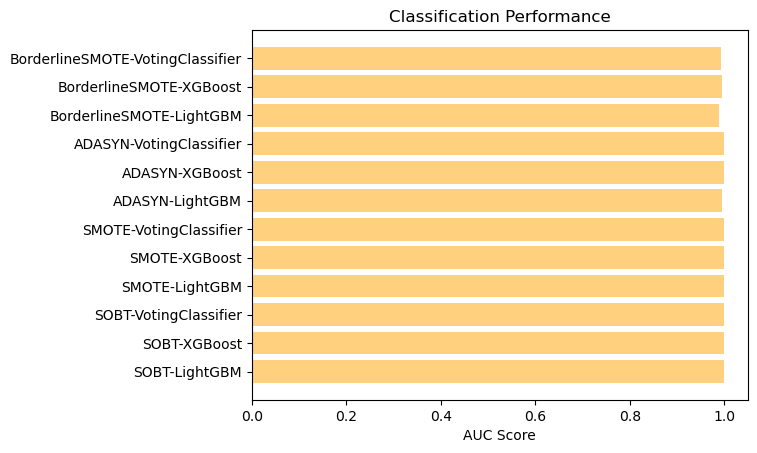

In [76]:
plt2.barh(y_pos, auc, align='center', alpha=0.5,color='orange')
plt2.yticks(y_pos, classifier)
plt2.xlabel('AUC Score')
plt2.title('Classification Performance')
plt2.show()